### KNN

In [11]:
import numpy as np
import pandas as pd

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# metricas
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, auc

# Para plotar a curva Roc
import scikitplot as skplt
import matplotlib.pyplot as plt

### lendo base

In [3]:
X = pd.read_csv("./data/preprocessamento/X_normalized.csv", index_col=0)
y = pd.read_csv("./data/preprocessamento/y.csv", header=None, index_col=0)

In [6]:
# Divindo treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [4]:
X.head()

,count_Teleport_t1,count_Cleanse_t1,count_Ghost_t1,count_Barrier_t1,count_Exhaust_t1,count_Ignite_t1,count_Smite_t1,count_Heal_t1,count_Flash_t1,count_Teleport_t2,...,firstBlood_2,firstTower_0,firstTower_1,firstTower_2,firstDragon_0,firstDragon_1,firstDragon_2,firstRiftHerald_0,firstRiftHerald_1,firstRiftHerald_2
0,0.25,0.000000,0.333333,0.0,0.25,0.2,0.25,0.25,0.75,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.25,0.000000,0.000000,0.0,0.25,0.2,0.25,0.25,1.00,0.2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.50,0.000000,0.000000,0.0,0.25,0.0,0.25,0.25,1.00,0.2,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.25,0.333333,0.000000,0.0,0.00,0.2,0.25,0.25,1.00,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.25,0.000000,0.000000,0.0,0.25,0.0,0.25,0.50,1.00,0.4,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [5]:
y.head(10)

,1
0,
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,2


In [11]:
# Criando KNN
clf  = KNeighborsClassifier(n_neighbors=3)

# CV 5
cv_scores = cross_val_score(clf, X, y, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when

In [12]:
print(cv_scores)

[0.66851151 0.6748228  0.66537192 0.66019229 0.66135768]


### Testando diferentes K

In [8]:
clf_5 = KNeighborsClassifier(n_neighbors=5)

clf_5.fit(X_train, y_train)

/home/demenezes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
y_pred = clf_5.predict(X_test)
y_prob =  clf_5.predict_proba(X_test)

print("Acuracia: ", accuracy_score(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

### Curva Roc

/home/demenezes/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


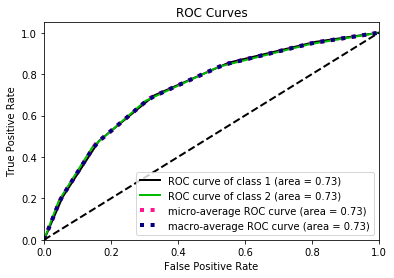

In [12]:
skplt.metrics.plot_roc_curve(y_test, y_prob)
plt.show()